**My project analyzes my LinkedIn connections to uncover patterns and relationships within my professional network. Using interactive visualizations, I explore data like top companies, common positions, shared last names, and clusters of connections based on shared attributes. This helps me better understand my network, identify key trends, and visualize how my connections are organized across different companies and roles.**

**I started this project to analyze my LinkedIn network and see what I could learn from it. I downloaded my LinkedIn data, which included names, companies, positions, and the time I connected with people. Then, I cleaned it up to make sure it was ready for analysis.
I created visualizations to explore patterns, like which companies I’m most connected to, the most common positions, and how my connections have grown over time. I also built interactive network graphs to show clusters of people based on shared companies or roles, with details that pop up when you hover over them.
This project helped me understand my professional network better, uncovering relationships and trends I wouldn’t have noticed otherwise.**

In [26]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt



**import relevant libraries for data manipulation and modelling and building visualisations**

In [27]:
# Open the file and read lines
with open('Connections.csv', 'r') as file:
    lines = file.readlines()

# Optionally, inspect the first few lines
print(lines[:10])

# Clean the lines - here we remove any lines with inconsistent columns
cleaned_lines = []
for line in lines:
    # Split the line by commas
    fields = line.split(',')

    # Check if the line has the expected number of fields (7 in this case)
    if len(fields) == 7:  # Adjust this based on your expected number of columns
        cleaned_lines.append(line)

# Write the cleaned lines back to a new file
with open('Cleaned_Connections.csv', 'w') as cleaned_file:
    cleaned_file.writelines(cleaned_lines)

print("Cleaning complete! The file is saved as 'Cleaned_Connections.csv'.")



['Notes:\n', '"When exporting your connection data, you may notice that some of the email addresses are missing. You will only see email addresses for connections who have allowed their connections to see or download their email address using this setting https://www.linkedin.com/psettings/privacy/email. You can learn more here https://www.linkedin.com/help/linkedin/answer/261"\n', '\n', 'First Name,Last Name,URL,Email Address,Company,Position,Connected On\n', 'Dr. Asim,Iftikhar,https://www.linkedin.com/in/dr-asim-iftikhar-24a19612,,Institute of Business Management (IoBM),Assitant Professor,19 Dec 2024\n', 'Wazir,Ali,https://www.linkedin.com/in/wazir-ali-2571a0106,,Institute of Business Management,Assistant Professor,19 Dec 2024\n', 'Junaid Ahmed,Uqaili,https://www.linkedin.com/in/junaiduqaili,,Universidad Pública de Navarra,Scientific Researcher,19 Dec 2024\n', 'MUSLIM JAMEEL,SYED, PhD,https://www.linkedin.com/in/syedmuslimjameel,,Atlantic Technological University,Assistant Professor 

**Clean the file for inconsistent columns, filter out by fields=7 so as to clean file for extra information that disturbs formatting**


In [28]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Cleaned_Connections.csv')

# Display the first few rows to inspect the data
print(df.tail())

# Step 1: Remove any rows where critical columns have missing values
# (Optional: You can modify this to drop rows with missing values in specific columns)
df = df.dropna(subset=['First Name', 'Last Name', 'Company', 'Connected On'])

# Step 2: Remove any leading/trailing spaces in the column names and data
df.columns = df.columns.str.strip()
df['First Name'] = df['First Name'].str.strip()
df['Last Name'] = df['Last Name'].str.strip()
df['Company'] = df['Company'].str.strip()


# Step 4: Ensure that the 'Connected On' column is in a datetime format (if necessary)
df['Connected On'] = pd.to_datetime(df['Connected On'], errors='coerce')  # Coerce invalid dates to NaT






         First Name   Last Name  \
247            Moiz      Uqaili   
248  Ghulam Murtaza      Uqaili   
249            Anum     Tajamul   
250        Dr. Syed  Areebuddin   
251          Mariam    Rehan 🇵🇸   

                                                   URL Email Address  \
247  https://www.linkedin.com/in/moiz-uqaili-909755246           NaN   
248          https://www.linkedin.com/in/murtazauqaili           NaN   
249  https://www.linkedin.com/in/anum-tajamul-3a150997           NaN   
250      https://www.linkedin.com/in/dr-syedareebuddin           NaN   
251          https://www.linkedin.com/in/mariam-rehan-           NaN   

                                 Company                   Position  \
247                        Verge Systems          Graphics Designer   
248                       The World Bank   Energy Consultant  (STC)   
249                karachi public school                    teacher   
250  Medicare Cardiac & General Hospital  Consultant Dental Surgeon   
2

**Cleaning the data further, removing missing values in columns, generally fitting it into a 7-column sheet and printing the tail to see numbers of errorful rows eliminated**

In [29]:
df = df.drop(columns=['Email Address'])
df.columns

Index(['First Name', 'Last Name', 'URL', 'Company', 'Position',
       'Connected On'],
      dtype='object')

**drop the email address column as was unnecessary to the analysis, more than 60% of the people have not allowed email addresses to be shown on their profile**

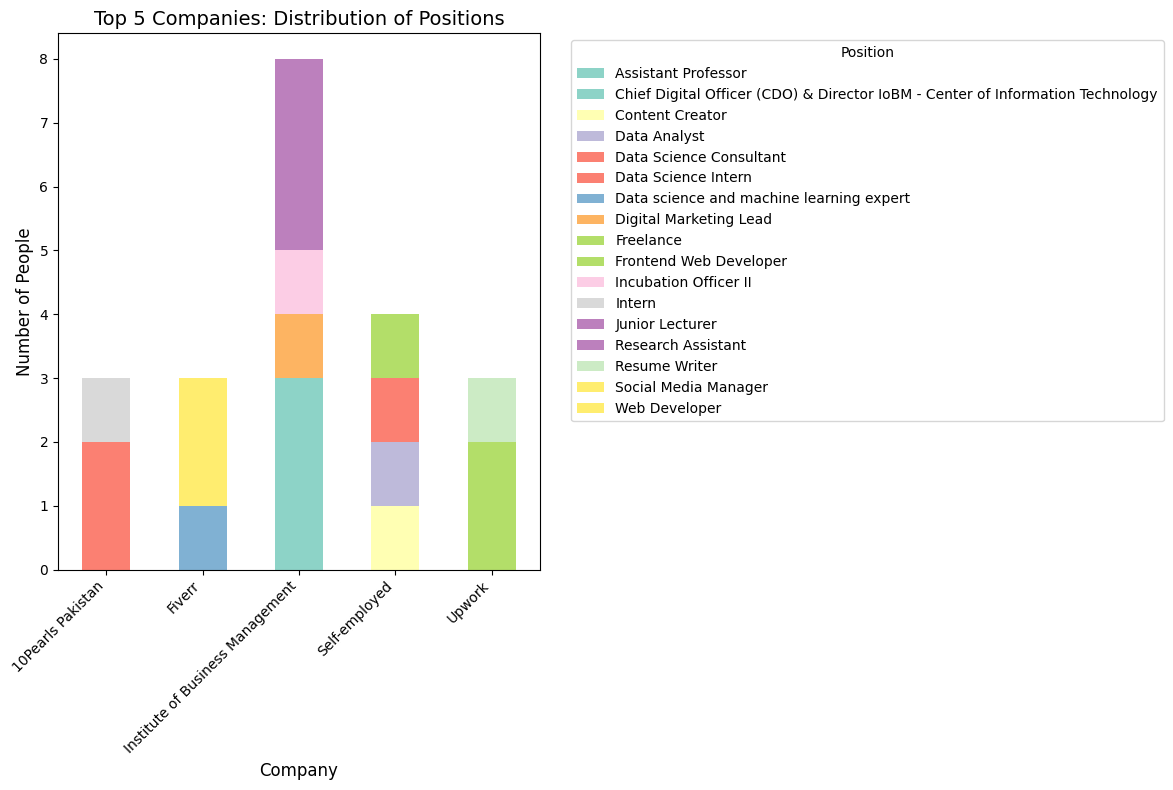

In [30]:


# Count the total number of people per company
company_counts = df['Company'].value_counts()

# Get the top 5 companies with the most people
top_5_companies = company_counts.head(5).index

# Filter the data to include only the top 5 companies
top_5_data = df[df['Company'].isin(top_5_companies)]

# Group by 'Company' and 'Position' and count the number of people
position_counts = top_5_data.groupby(['Company', 'Position']).size().reset_index(name='Count')

# Pivot the table for better visualization in a stacked bar chart
pivot_data = position_counts.pivot(index='Company', columns='Position', values='Count').fillna(0)

# Plot the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='Set3')

# Adding labels and title
plt.title('Top 5 Companies: Distribution of Positions', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()




**Stacked Bar chart distributed on job titles (positions in the csv files), based off their companies are shown. For eg. On the FIverr stack, we can see that there is one (1) "Data Science and Machine learning expert" and two (2) "Web Developer".**

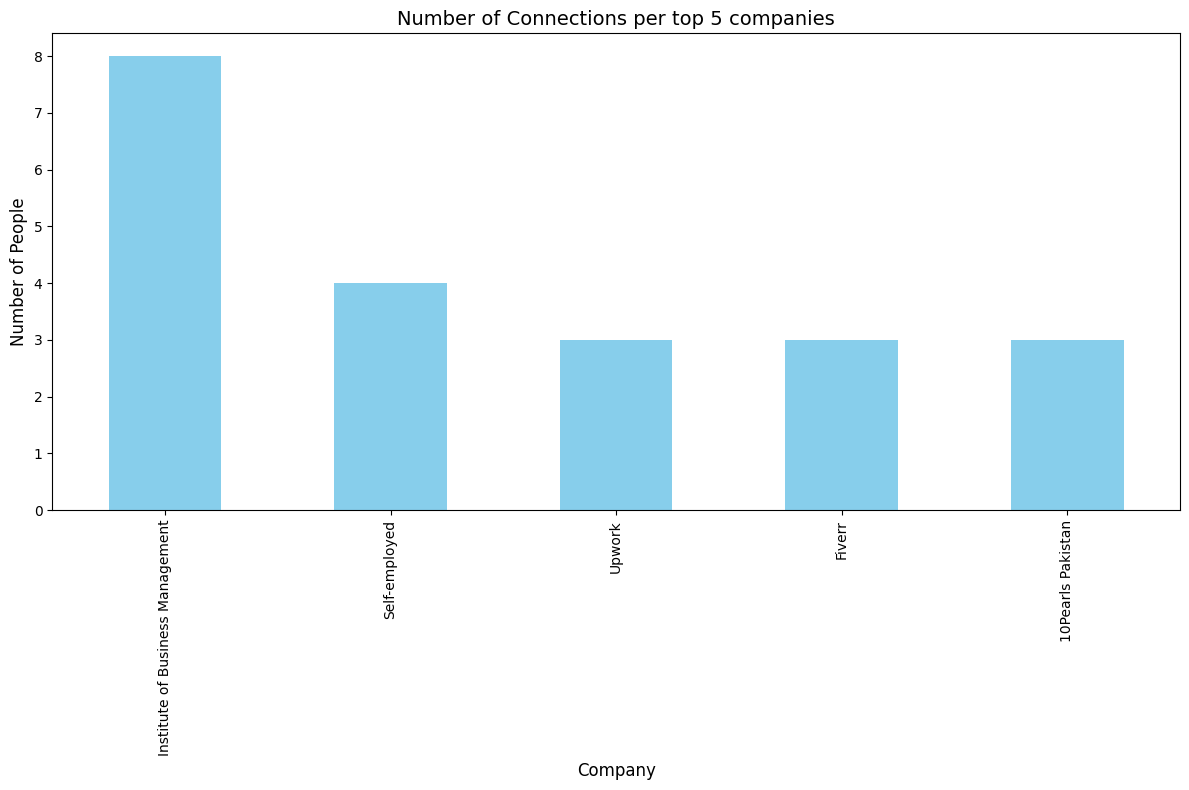

In [31]:


# Count the number of people per company
company_counts = df['Company'].value_counts()

# Count the number of people per company
company_counts = df['Company'].value_counts()

# Filter to show only the top 5 companies
top_5_companies = company_counts.head(5)

# Plot the bar chart
plt.figure(figsize=(12, 8))
top_5_companies.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Number of Connections per top 5 companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


**Top 5 companies my connections work at. We see that im connected more to people in 10Pearls Pakistan more than anyone else, second the people at my university. Other than that Im well versed also with student earners on Fiverr and Upwork**

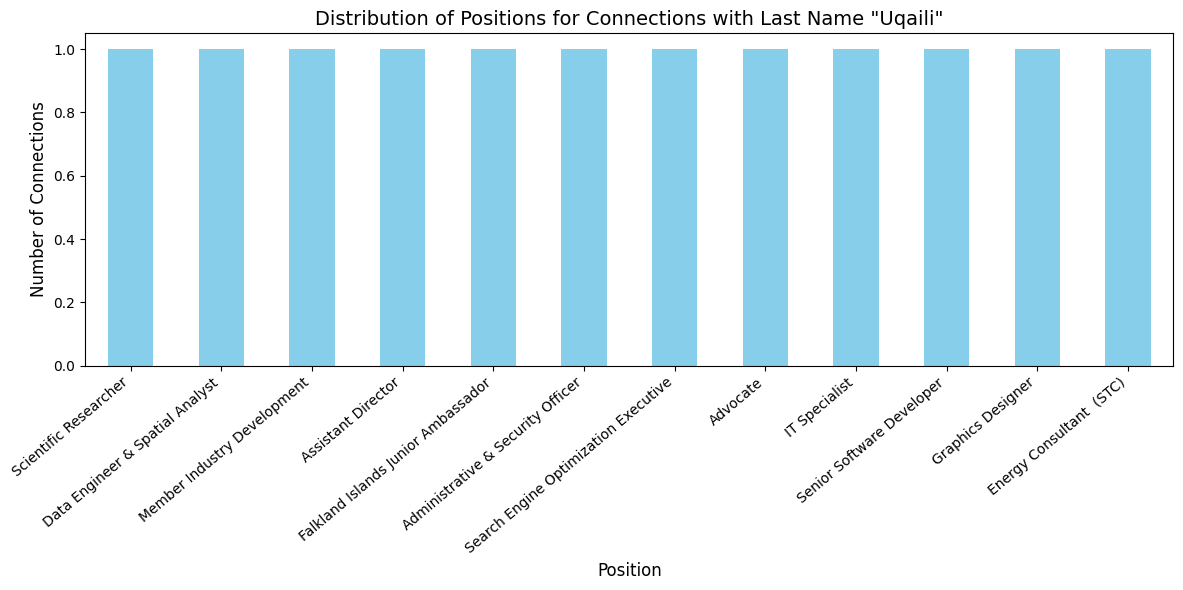

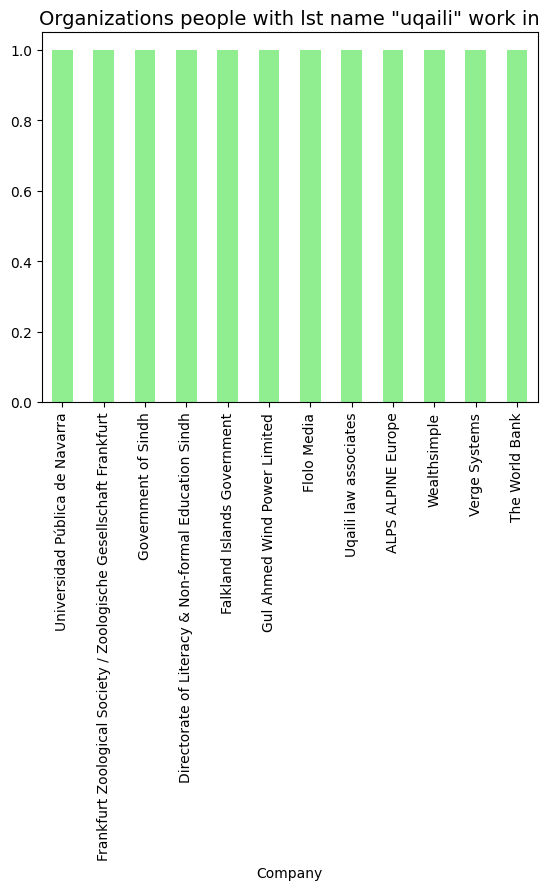

In [32]:


# Filter the dataset for connections with the last name "Uqaili"
uqaili_data = df[df['Last Name'] == 'Uqaili']

# Count the number of connections by position for "Uqaili"
uqaili_position_counts = uqaili_data['Position'].value_counts()

# Plot the position distribution for "Uqaili"
plt.figure(figsize=(12, 6))
uqaili_position_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Distribution of Positions for Connections with Last Name "Uqaili"', fontsize=14)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Number of Connections', fontsize=12)
plt.xticks(rotation=40, ha='right')

plt.tight_layout()
plt.show()



uqaili_company_counts = uqaili_data['Company'].value_counts()
uqaili_company_counts.plot(kind='bar', color='lightgreen')
plt.title('Organizations people with lst name "uqaili" work in', fontsize=14),



# Create a NetworkX graph
G = nx.Graph()

# Add nodes for each person
for _, row in uqaili_data.iterrows():
    person = row['First Name'] + " " + row['Last Name']
    G.add_node(person, company=row['Company'], position=row['Position'])

# Add edges based on shared companies and positions
for i, row1 in uqaili_data.iterrows():
    for j, row2 in uqaili_data.iterrows():
        if i >= j:  # Avoid double-counting edges
            continue
        # Connect nodes if they work at the same company or hold the same position
        person1 = row1['First Name'] + " " + row1['Last Name']
        person2 = row2['First Name'] + " " + row2['Last Name']

        if row1['Company'] == row2['Company']:
            G.add_edge(person1, person2, relationship='Company')
        if row1['Position'] == row2['Position']:
            G.add_edge(person1, person2, relationship='Position')






**Practice on extracting positions and companies by way of singling out a last name, here 'Uqaili'. We see that all people with the last name 'Uqaili' dont share workplaces. This technique has applications in checking for nepotism in companies and industries where this may be prevalent i.e. the media or entertaintment industry etc.**

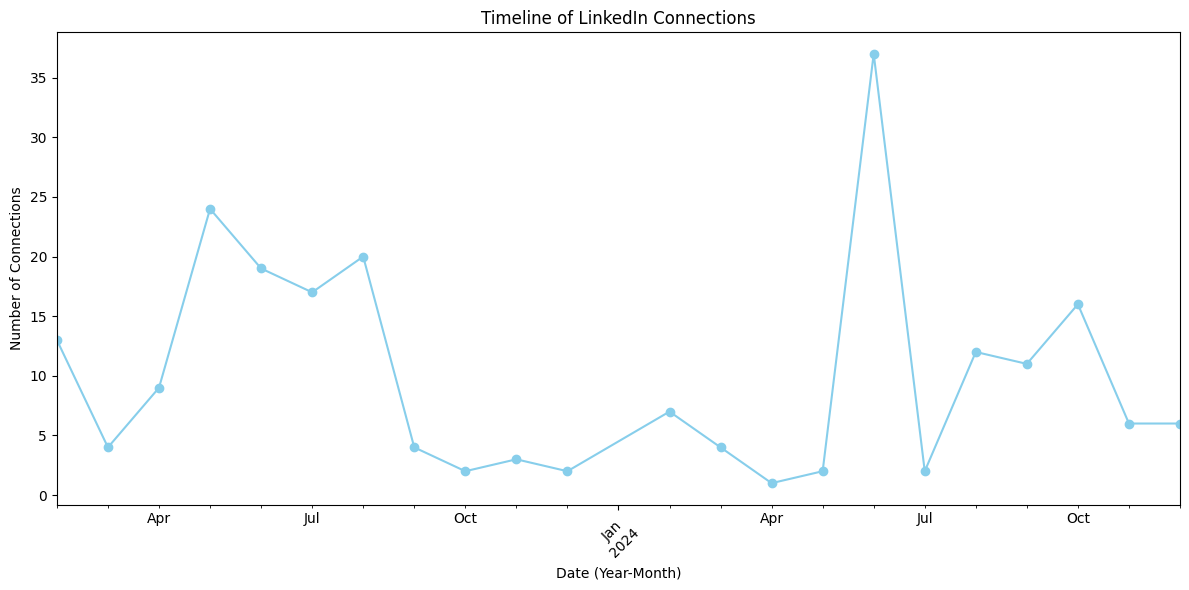

In [33]:
# Convert the 'Connected On' column to datetime format
df['Connected On'] = pd.to_datetime(df['Connected On'], errors='coerce')

# Extract the year and month from the 'Connected On' column
df['Year-Month'] = df['Connected On'].dt.to_period('M')

# Count the number of connections made in each year-month period
connections_per_month = df['Year-Month'].value_counts().sort_index()

# Plot the timeline of connections
plt.figure(figsize=(12, 6))
connections_per_month.plot(kind='line', color='skyblue', marker='o')
plt.title('Timeline of LinkedIn Connections')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Number of Connections')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Linear graph of me building connections on linkedin. We can see that Im active on Linked in the 2nd Quarter in the summer break of university as i'm able to attend more talks and lectures and connect with speakers with a greater frequency than other times.
Dips in activity before April and January signify times of lesser activity, largely due to this falling under exam season.
We can deduce that my social media usage history is fairly consistent, predictable and in line with Studies as my priority.**

In [34]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

# Load the cleaned data
df = pd.read_csv('Cleaned_Connections.csv')

# Fill missing values with a placeholder or empty string
df['First Name'] = df['First Name'].fillna('Unknown')
df['Last Name'] = df['Last Name'].fillna('Unknown')

# Create a graph object
G = nx.Graph()

# Add nodes and edges based on shared companies or positions
for index, row in df.iterrows():
    # Create a node for each person using 'First Name' and 'Last Name'
    person_name = row['First Name'] + " " + row['Last Name']
    G.add_node(person_name, company=row['Company'], position=row['Position'])

    # Add edges based on shared companies or positions
    for index2, row2 in df.iterrows():
        if row['Company'] == row2['Company'] and person_name != (row2['First Name'] + " " + row2['Last Name']):
            G.add_edge(person_name, row2['First Name'] + " " + row2['Last Name'])
        if row['Position'] == row2['Position'] and person_name != (row2['First Name'] + " " + row2['Last Name']):
            G.add_edge(person_name, row2['First Name'] + " " + row2['Last Name'])

# Find connected components (clusters)
clusters = list(nx.connected_components(G))

# Assign cluster names based on the company and position
cluster_info = {}
for idx, cluster in enumerate(clusters):
    cluster_name = f"Cluster {idx+1}"
    for node in cluster:
        node_data = df[df['First Name'] + ' ' + df['Last Name'] == node].iloc[0]
        cluster_info[node] = {
            'cluster_name': cluster_name,
            'company': node_data['Company'],
            'position': node_data['Position']
        }

# Get positions for the nodes in the network
pos = nx.spring_layout(G, seed=42)

# Extract edge and node data for Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

node_x = []
node_y = []
node_text = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    cluster_data = cluster_info[node]
    node_text.append(f"{node}<br>Cluster: {cluster_data['cluster_name']}<br>Company: {cluster_data['company']}<br>Position: {cluster_data['position']}")

# Plot the network using Plotly
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Degree',
            xanchor='left',
            titleside='right'
        )
    ),
    text=node_text)

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='LinkedIn Network Visualization: Connections based on Company/Position',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=40),
                    xaxis=dict(showgrid=False, zeroline=False),
                    yaxis=dict(showgrid=False, zeroline=False))
)
fig.write_html("fig6 network.html")

fig.show()


**Interactive visualization shows my LinkedIn network as a graph, where each node represents a person, and edges connect people who either work at the same company or share the same position. Clusters represent groups of connections based on shared companies or roles, with cluster names displayed for context. I can hover over nodes to see details like the person's name, company, and position, making it easy to explore how my connections are organized and identify key patterns in my personal linkedin network.**

if this figure is causing problems in showing, kindly refer to "fig6 network.html" in the zip folder, so the interactive functionality is visible.